<a href="https://colab.research.google.com/github/palash04/Artificial-Intelligence/blob/master/Neural_Networks/Intro_to_NN/_01_Perceptron_to_Gradient_descent_to_Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Screenshot 2020-06-26 at 18 14 39](https://user-images.githubusercontent.com/26361028/85864457-2e917d00-b7e2-11ea-922a-dc3d9279eebd.png)
![Screenshot 2020-06-26 at 18 16 06](https://user-images.githubusercontent.com/26361028/85864469-32250400-b7e2-11ea-87b7-9c3a83ef3d40.png)


In [ ]:
# Equation for perceptron - 
# Wx + b = 0
# W = {w1,w2,w3,....wn}
# x = {x1,x2,x3,....xn}
# Here, W is list of weights
# x is the list of features
# b is the bias

# Prediction : 
# y^ (y-hat) : 1  if Wx + b >= 0
#            : 0  if Wx + b < 0

# (y-hat) is the prediction done, and we compare it with Y
# Y is the output label in the dataset


In [1]:
# Perceptron as logical operators

In [ ]:
# AND Perceptron

![Screenshot 2020-06-26 at 18 32 19](https://user-images.githubusercontent.com/26361028/85864608-5f71b200-b7e2-11ea-8575-6b720f433d7e.png)


In [11]:
import pandas as pd

# setting the hardcoded weights
weight1 = 1
weight2 = 1
bias = -1.1

# Inputs and outputs
test_inputs = [(0,0),(0,1),(1,0),(1,1)]
correct_outputs = [False,False,False,True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
  linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
  output = int(linear_combination >= 0)
  is_correct_string = 'Yes' if output == correct_output else 'No'
  outputs.append([test_input[0],test_input[1],linear_combination,output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=[' Input1 ',' Input2 ',' Linear Combination ', ' Activation Ouput ', ' Is Correct '])
if not num_wrong:
  print ('Nice! Got it all correct')
else:
  print ('You got {} wrong. Keep trying'.format(wrong_num))
print(output_frame)


Nice! Got it all correct
    Input1    Input2    Linear Combination    Activation Ouput   Is Correct 
0         0         0                  -1.1                   0          Yes
1         0         1                  -0.1                   0          Yes
2         1         0                  -0.1                   0          Yes
3         1         1                   0.9                   1          Yes


In [12]:
# Although in above case, perceptrons are created manually but, in real life we just give the inputs, results, and perceptron is build by themseolves.

![Screenshot 2020-06-26 at 20 55 56](https://user-images.githubusercontent.com/26361028/85873911-710d8680-b7ef-11ea-86b3-8c8d22cdc883.png)


In [13]:
# In above image we can see that the blue point which is in the red zone is misclassified. So, tweak the equation of line. 
# By not introducing learning rate we might misclassify some other points, but by introducing it we slowly move the line, and thereby not disturbing other points.

![Screenshot 2020-06-26 at 21 18 41](https://user-images.githubusercontent.com/26361028/85875938-9fd92c00-b7f2-11ea-8bcb-e67019b1778a.png)

In [1]:
# For a misclassified point - 
# 1. if prediction is 0 : that means the point should have been above the line, so we add
# 2. if prediction is 1 : that means the point should have been below the line, so we subtract

In [14]:
# Basic Perceptron model for linear boundaries

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

def perceptronStep(X, y, W, b, learn_rate):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i] - y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i] - y_hat == 0:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W,b

# Non Linear Regions

![Screenshot 2020-06-27 at 08 47 38](https://user-images.githubusercontent.com/26361028/85913473-dcd50b00-b852-11ea-952c-166c785b841d.png)


In [15]:
# Idea - Calculating error functions
# Error functions - Distance between current point and actual target

# Calculating a proper error function - 
# We need to shift from discrete error function to continuous error function

# Discrete error function - step function ... as used in the above perceptron model
# Continuous error function - sigmoid function

# Sigmioid function - 
#         For a large positive numbers, sig func will give the values close to one
#         For a large negative numbers, sig func will give the values close to zero
#         For numbers, sig func will give the values close to 0.5


# Activation Functions - 
![Screenshot 2020-06-27 at 09 03 52](https://user-images.githubusercontent.com/26361028/85913770-2161a600-b855-11ea-8d1b-23679633d562.png)

![Screenshot 2020-06-27 at 09 04 46](https://user-images.githubusercontent.com/26361028/85913784-41916500-b855-11ea-8781-786c08d2ee4e.png)



![Screenshot 2020-06-27 at 09 07 42](https://user-images.githubusercontent.com/26361028/85913824-a9e04680-b855-11ea-9b62-757bf1cb91cf.png)
![Screenshot 2020-06-27 at 09 09 54](https://user-images.githubusercontent.com/26361028/85913853-f7f54a00-b855-11ea-83ab-99623f8f34c4.png)

### Discrete - A student will get accepted(1) or rejected(0)
### Continuous - Probability that student will get accepted is this much. 

In [18]:
# When we need to classify between two classes like -  cat or dog, accepted or rejected, etc.. we use sigmoid function
# But, when we need to classify among 3 or more objects like (cat or dog or bird), etc.. we use softmax function

![Screenshot 2020-06-27 at 10 24 59](https://user-images.githubusercontent.com/26361028/85914903-7656e980-b860-11ea-9a44-0e65f6a15b89.png)

![Screenshot 2020-06-27 at 10 26 39](https://user-images.githubusercontent.com/26361028/85914930-b0c08680-b860-11ea-977f-b50e70e680a2.png)


In [16]:
# coding softmax
import numpy as np

# a function that takes as input a list of numbers, 
# and returns the list of values given by the softmax function.

def softmax(L):
  expL = np.exp(L)
  sumExpl = sum(expL)
  result = []
  for i in expL:
    result.append(i*1.0/sumExpl)
  return result


![Screenshot 2020-06-27 at 10 56 18](https://user-images.githubusercontent.com/26361028/85915400-d51e6200-b864-11ea-8cd7-6226ab9f5cc9.png)


# Maximum Likelihood
![Screenshot 2020-06-27 at 11 12 19](https://user-images.githubusercontent.com/26361028/85915668-131c8580-b867-11ea-80fa-f9e3c7080523.png)



![Screenshot 2020-06-27 at 12 24 41](https://user-images.githubusercontent.com/26361028/85916739-2f252480-b871-11ea-8f50-db2a6b30a312.png)

### The points that are correctly classified have small errors, 
### The points that are missclassified have large errors.

## So the cross entropy tells us whether the model is good or bad.

In [17]:
# Goal : Instead of maximizing the probability, we try minimizing the cross entropy in order to get from the model in the left to the model in the right

In [ ]:
# So that error function is precisely called as cross entropy
# Connection between probabilities and error functions, is called cross-entropy

# Given the events and probabilities, how likely is it that the events happens based on the probabilities
# If it is very likely then, we have small cross entropy
# If it is very unlikely then, we have large cross entropy

![Screenshot 2020-06-27 at 12 45 58](https://user-images.githubusercontent.com/26361028/85917036-297d0e00-b874-11ea-859f-2e30d0065711.png)

## The second row above tells high probability and low cross entropy which is most likely to happen.
## whereas, the second last row above tells low probability and high cross entropy which is most unlikely to happen.

![Screenshot 2020-06-27 at 12 56 21](https://user-images.githubusercontent.com/26361028/85917187-9cd34f80-b875-11ea-82aa-82f33835a78b.png)


In [4]:
# Coding cross entropy

import numpy as np

# Y, and P are two lists
def cross_entropy(Y, P):
    Y = np.float_(Y)
    P = np.float_(P)
    
    return -np.sum(Y * np.log(P) + (1-Y) * np.log(1-P))


Y = [1,0,1,1]
P = [0.4,0.6,0.1,0.5]

print (cross_entropy(Y,P))

4.828313737302301


![Screenshot 2020-06-27 at 16 25 41](https://user-images.githubusercontent.com/26361028/85920611-d9617400-b892-11ea-981b-d1f8b0980b7e.png)


![Screenshot 2020-06-27 at 17 00 39](https://user-images.githubusercontent.com/26361028/85921163-bbe2d900-b897-11ea-812e-c4b3b141c928.png)
![Screenshot 2020-06-27 at 17 01 00](https://user-images.githubusercontent.com/26361028/85921167-c8673180-b897-11ea-9588-9f9ca5c9f1f3.png)


In [5]:
# Logistic Regression algorithm
# . Take your data
# . Pick a random model
# . Calculate the error
# . Minimize the error, and obtain a better model


![Screenshot 2020-06-27 at 17 38 54](https://user-images.githubusercontent.com/26361028/85921878-15013b80-b89d-11ea-9ccd-805d895f369a.png)

Minimizing the error can be done using gradient descent.


![Screenshot 2020-06-27 at 18 00 27](https://user-images.githubusercontent.com/26361028/85922330-15e79c80-b8a0-11ea-980f-6162f4d83d2f.png)
![Screenshot 2020-06-27 at 18 00 35](https://user-images.githubusercontent.com/26361028/85922336-1aac5080-b8a0-11ea-8909-1e8efa435c54.png)


![Screenshot 2020-06-27 at 18 06 40](https://user-images.githubusercontent.com/26361028/85922450-f4d37b80-b8a0-11ea-9bc7-69d25f2ce256.png)


In [1]:
# Implementing the gradient descent algorithm

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
# Some helper functions for plotting and drawing lines
def plot_points(X,y):
  admitted = X[np.argwhere(y == 1)]
  rejected = X[np.argwhere(y == 0)]
  plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')
  plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

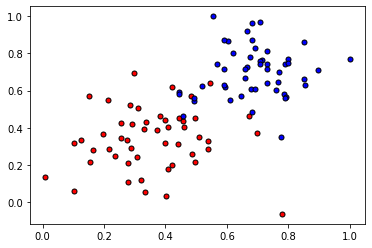

In [13]:
# Reading and plotting the data
data = pd.read_csv('/content/drive/My Drive/Artificial Intelligence/DataSet/data_NN1.csv', header = None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

In [24]:
# Implementing the basic functions

# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features,weights) + bias)

# Error (log-loss) formula
def error_formula(y, output):
    return -y * np.log(output) - (1-y) * np.log(1 - output)

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x,weights,bias)
    d_error = y - output
    weights += learnrate * d_error * x
    bias += learnrate * d_error
    return weights,bias

In [29]:
# Training function

np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines = False):
  errors = []
  n_recors, n_features = features.shape
  last_loss = None
  weights = np.random.normal(scale=1/n_features**0.5, size = n_features)
  bias = 0
  for e in range(epochs):
    for x,y in zip(features,targets):
      output = output_formula(x,weights,bias)
      error = error_formula(y,output)
      weights,bias = update_weights(x,y,weights,bias,learnrate)

    # Printing out the log loss error on the training set
    out = output_formula(features,weights,bias)
    loss = np.mean(error_formula(targets,out))
    errors.append(loss)
    if e % (epochs / 10) == 0:
        print("\n========== Epoch", e,"==========")
        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss
        predictions = out > 0.5
        accuracy = np.mean(predictions == targets)
        print("Accuracy: ", accuracy)
    if graph_lines and e % (epochs / 100) == 0:
        display(-weights[0]/weights[1], -bias/weights[1])

  # Plotting the solution boundary
  plt.title("Solution boundary")
  display(-weights[0]/weights[1], -bias/weights[1], 'black')

  # Plotting the data
  plot_points(features, targets)
  plt.show()

  # Plotting the error
  plt.title("Error Plot")
  plt.xlabel('Number of epochs')
  plt.ylabel('Error')
  plt.plot(errors)
  plt.show()




========== Epoch 0 ==========
Train loss:  0.7135845195381634
Accuracy:  0.4

========== Epoch 10 ==========
Train loss:  0.6225835210454962
Accuracy:  0.59

========== Epoch 20 ==========
Train loss:  0.5548744083669508
Accuracy:  0.74

========== Epoch 30 ==========
Train loss:  0.501606141872473
Accuracy:  0.84

========== Epoch 40 ==========
Train loss:  0.4593334641861401
Accuracy:  0.86

========== Epoch 50 ==========
Train loss:  0.42525543433469976
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.3973461571671399
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.3741469765239074
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.35459973368161973
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.3379273658879921
Accuracy:  0.94


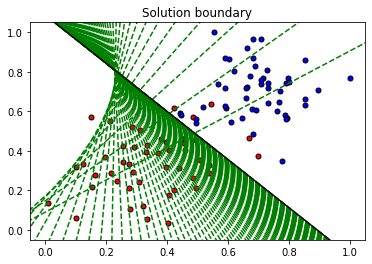

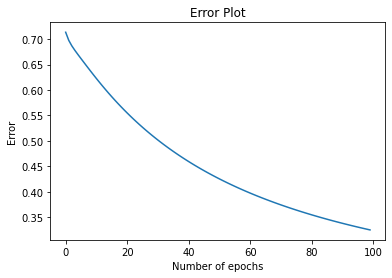

In [30]:
train(X, y , epochs, learnrate, True)

# Non Linear Data
![Screenshot 2020-06-28 at 11 58 12](https://user-images.githubusercontent.com/26361028/85939890-a670bc00-b936-11ea-8b90-f0db87866ad5.png)
0.7 and 0.8 is the probability of the same point in two different models.
We combine these probabilities by multiplying with the weights and adding the bias, then passing it to a sigmoid function to get a new probability for that point between (0 and 1, ofcourse)

![Screenshot 2020-06-28 at 12 05 16](https://user-images.githubusercontent.com/26361028/85940032-a2916980-b937-11ea-86cc-6f0771825217.png)
![Screenshot 2020-06-28 at 12 05 52](https://user-images.githubusercontent.com/26361028/85940051-b8069380-b937-11ea-9421-3a20a784fa91.png)
![Screenshot 2020-06-28 at 12 06 22](https://user-images.githubusercontent.com/26361028/85940056-c9e83680-b937-11ea-8a66-b75367bfd64b.png)


![Screenshot 2020-06-28 at 12 20 42](https://user-images.githubusercontent.com/26361028/85940408-cb1a6300-b939-11ea-8016-8e62b2c17b45.png)
![Screenshot 2020-06-28 at 12 21 08](https://user-images.githubusercontent.com/26361028/85940413-da99ac00-b939-11ea-8599-bc7dc3493339.png)
![Screenshot 2020-06-28 at 12 21 29](https://user-images.githubusercontent.com/26361028/85940419-e6856e00-b939-11ea-8199-dae49ab345b0.png)
![Screenshot 2020-06-28 at 12 21 45](https://user-images.githubusercontent.com/26361028/85940422-f0a76c80-b939-11ea-8052-60279928b148.png)


# Feed Forward neural network
![Screenshot 2020-06-28 at 17 20 47](https://user-images.githubusercontent.com/26361028/85946686-b6eb5b80-b963-11ea-8b32-ef2d698815a8.png)


# Backpropagation
![Screenshot 2020-06-28 at 17 38 15](https://user-images.githubusercontent.com/26361028/85947069-27937780-b966-11ea-86c0-ae29a51e98ab.png)
![Screenshot 2020-06-28 at 17 37 38](https://user-images.githubusercontent.com/26361028/85947052-10ed2080-b966-11ea-90c4-9309594b34a3.png)

![Screenshot 2020-06-28 at 18 47 10](https://user-images.githubusercontent.com/26361028/85948674-c83a6500-b96f-11ea-9f25-769e9c38e4e9.png)
![Screenshot 2020-06-28 at 18 53 08](https://user-images.githubusercontent.com/26361028/85948840-9d044580-b970-11ea-8ed9-41346a0d9df6.png)
